In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/abby/miniconda3/envs/PythonData/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df.loc[:,['koi_period', 'koi_impact', 'koi_teq','koi_insol']]
selected_features.head()
selected_features.shape

(6991, 4)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
y = df['koi_disposition']
y.shape

(6991,)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)
X_train.head()

,koi_period,koi_impact,koi_teq,koi_insol
6122,6.768901,0.150,1017,253.30
6370,0.733726,0.291,1867,2891.64
2879,7.652707,0.970,989,226.81
107,7.953547,0.300,696,55.37
29,4.959319,0.831,1103,349.40


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model

K: 1, Train/Test Score: 1.000/0.503
K: 3, Train/Test Score: 0.742/0.528
K: 5, Train/Test Score: 0.683/0.527
K: 7, Train/Test Score: 0.664/0.534
K: 9, Train/Test Score: 0.654/0.546
K: 11, Train/Test Score: 0.645/0.551
K: 13, Train/Test Score: 0.644/0.553
K: 15, Train/Test Score: 0.634/0.555
K: 17, Train/Test Score: 0.635/0.546
K: 19, Train/Test Score: 0.634/0.556


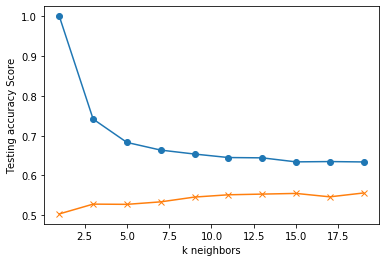

In [11]:
# loop through differnt k values to find the value with the highest accuracy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"K: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker='x')
plt.xlabel('k neighbors')
plt.ylabel('Testing accuracy Score')
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)

print(f"k = 11: Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"k = 11: Testing Data Score: {knn.score(X_test_scaled, y_test)}")

k = 11: Training Data Score: 0.6450505435819187
k = 11: Testing Data Score: 0.551487414187643


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
# print(grid2.best_params_)
# print(grid2.best_score_)

# Save the Model

In [13]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn.sav'
joblib.dump(knn, filename)

['knn.sav']